# Proyek Analisis Data: [Bike sharing Dataset]
- **Nama:** [Danan Rukmana]
- **Email:** [gmgdanan@gmail.com]
- **ID Dicoding:** [Danan Rukmana]
- **Jenis Dataset:** [Bike sharing Dataset]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kapan jam paling sibuk untuk penyewaan sepeda ?
- Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap penyewaan sepeda apa berpengaruh ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('dataset/day.csv')
df_day = pd.DataFrame(df)
df = pd.read_csv('dataset/hour.csv')
df_hour = pd.DataFrame(df)


**Insight:**
- Table hour terdiri dari 17 columns dan 17379 rows
- Table day terdiri dari 16 columns dan 731 rows

### Assessing Data

In [3]:
# Tabel hour
df_hour.info()
df_hour.isna().sum()
df_hour.duplicated().sum()
df.describe()

#Tabel day
df_day.info()
df_day.isna().sum()
df_day.duplicated().sum()
df_day.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- 2 table tersebut sudah baik hanya saja perbaikan perubahan type data columns dteday dari object ke date time
- 2 table tersebut tidak ada nilai kosong dan duplikat

### Cleaning Data

In [4]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- Perubahan type data kolom dteday dari table hour menjadi datetime
- Perubahan type data kolom dteday dari table day menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_5180\1840208226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bulan_rental.index, y=bulan_rental.values, palette="Blues_d")


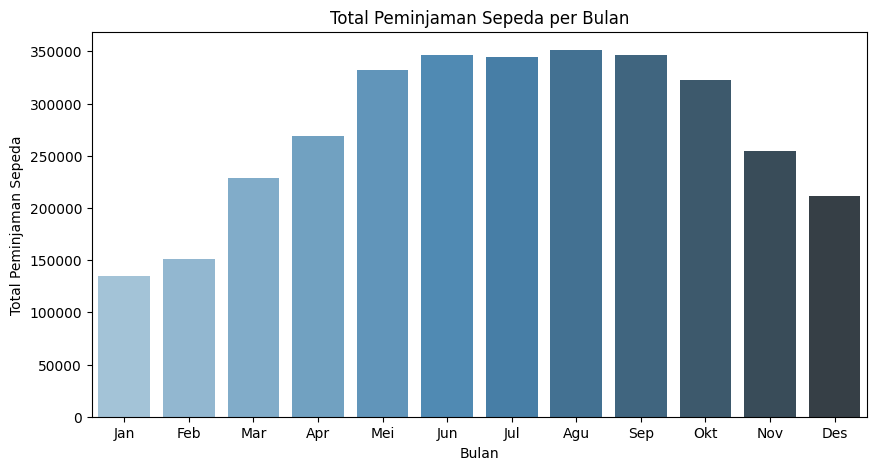

In [5]:
# 1. Agregasi jumlah peminjaman sepeda berdasarkan bulan
bulan_rental = df_day.groupby("mnth")["cnt"].sum()
seson_rental = df_day.groupby("season")["cnt"].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=bulan_rental.index, y=bulan_rental.values, palette="Blues_d")
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Total Peminjaman Sepeda per Bulan")
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_5180\2262625459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seson_rental.index, y=seson_rental.values, palette="Oranges_d")


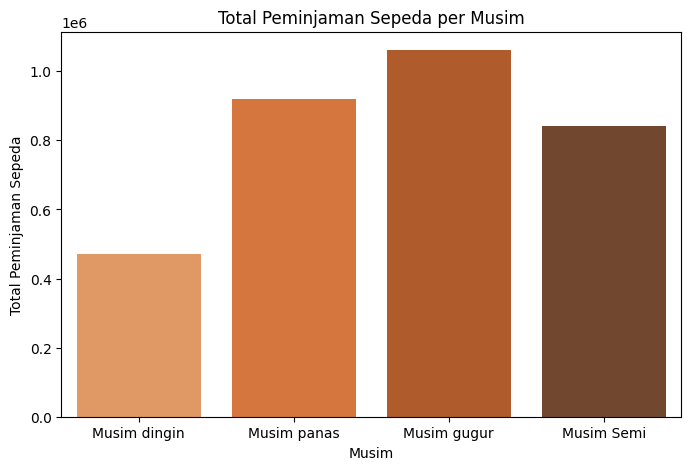

In [6]:
# 2. Agregasi jumlah peminjaman sepeda berdasarkan Musim
plt.figure(figsize=(8, 5))
sns.barplot(x=seson_rental.index, y=seson_rental.values, palette="Oranges_d")
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Total Peminjaman Sepeda per Musim")
plt.xticks([0, 1, 2, 3], ["Musim dingin", "Musim panas", "Musim gugur", "Musim Semi"])
plt.show()

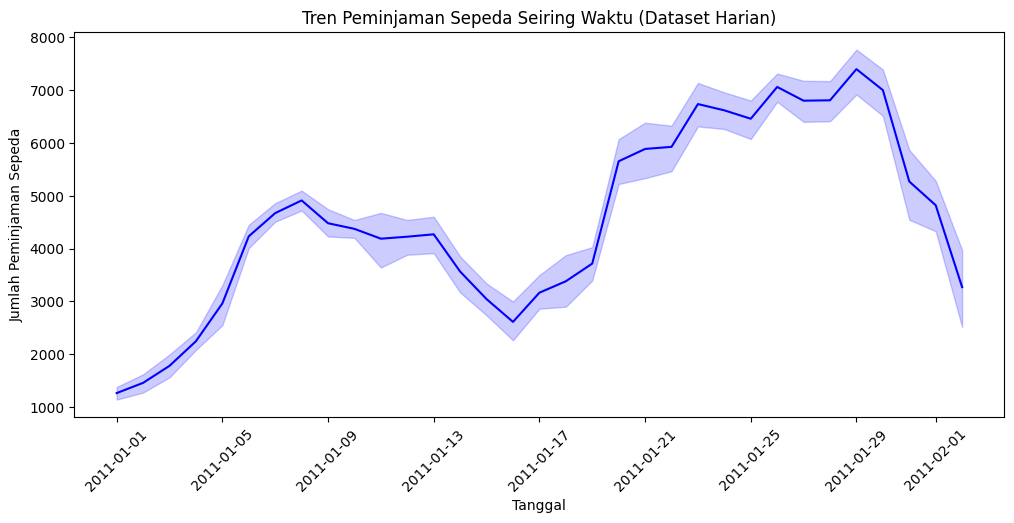

In [7]:
# 3.Tren peminjaman sepeda berdasarkan harian
plt.figure(figsize=(12, 5))
sns.lineplot(x=df_day["dteday"], y=df_day["cnt"], color="blue")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Seiring Waktu (Dataset Harian)")
plt.xticks(rotation=45)
plt.show()



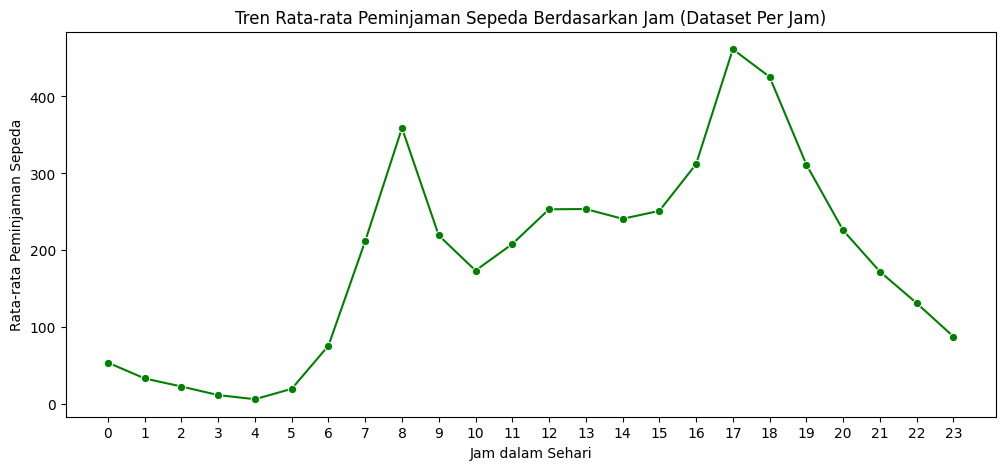

In [8]:
# 4. Tren peminjaman sepeda berdasarkan perjam
plt.figure(figsize=(12, 5))
sns.lineplot(x=df_hour["hr"], y=df_hour.groupby("hr")["cnt"].mean(), marker="o", color="green")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Tren Rata-rata Peminjaman Sepeda Berdasarkan Jam (Dataset Per Jam)")
plt.xticks(range(0, 24))
plt.show()

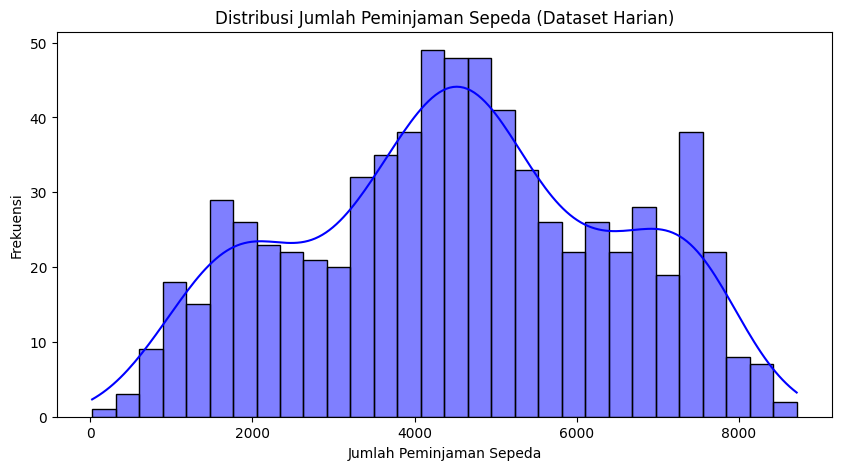

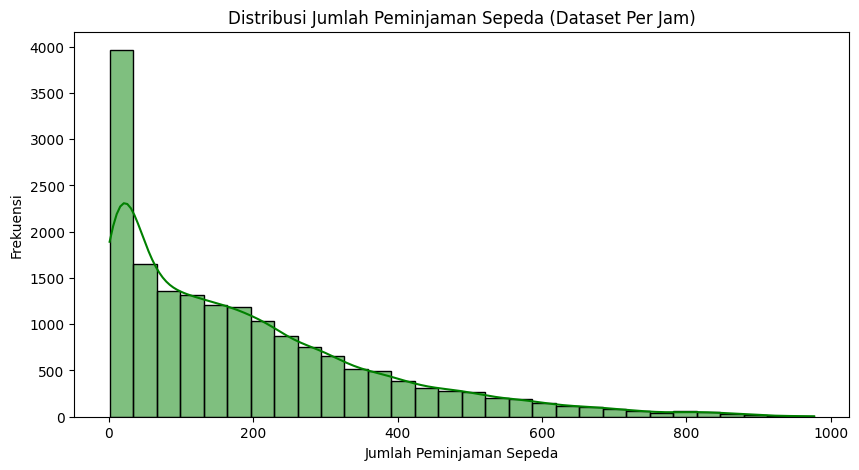

In [9]:
# Plot distribusi jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.histplot(df_day["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Peminjaman Sepeda (Dataset Harian)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_hour["cnt"], bins=30, kde=True, color="green")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Peminjaman Sepeda (Dataset Per Jam)")
plt.show()

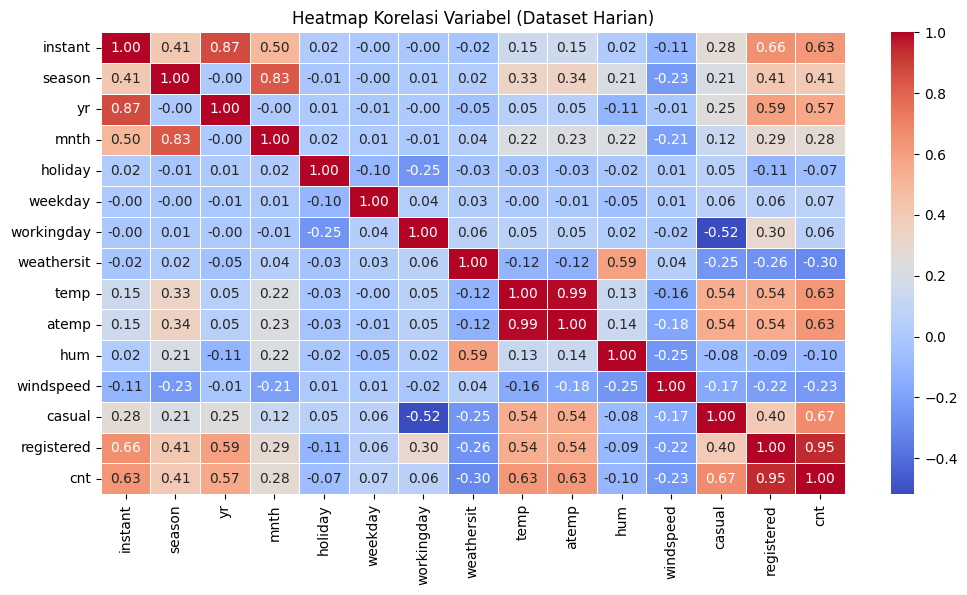

In [10]:
plt.figure(figsize=(12, 6))  
sns.heatmap(df_day.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel (Dataset Harian)")

plt.show()

**Insight:**
- 1. Agregasi jumlah peminjaman sepeda berdasarkan bulan, pada visual nya dijelaskan dari januari yang nilai jumlah penyewanya 13.4933 meningkat secara perlahan dan puncaknya pada bulan agustus dengan jumlah penyewa 351.194 Kemudian agustus ke desember mengalami penurunan dan di bulan desember total penyewa 211.036 ada yang harus dievaluasi mengapa bisa mengalami penurunan agar bisa meningkatkan pendapatan seperti bulan januari hingga agustus
- 2. Agregasi jumlah peminjaman per musim, Musim gugur memiliki peminjaman tertinggi yaitu 1061129, kemudian musim panas jumlah penyewa 918589, musim semi 841613 dan terakhir memiliki peminjaman terendah, yaitu cuaca dingin kemungkinan karena cuaca dingin yang kurang mendukung aktivitas bersepeda. Dengan informasi ini perusahaan bisa menambahkan sepeda di musim gugur dan mengurangi di musim dingin 
- 3. Tren dalam harian, Jumlah peminjaman sepeda mengalami peningkatan dengan keseluruhan dari waktu ke waktu, menunjukkan tren penggunaan yang meningkat bisnis berjalan baik dan lancar.
- 4. peminjaman sepeda cenderung meningkat pada pagi dan sore hari jam 8 sebanyak 359.011004 penyewa, jam 17 sebanyak 461.452055 penyewa, dan jam 18 sebanyak 425.510989 kemungkinan besar karena jam berangkat dan pulang kerja or sekolah, Oleh sebab itu banyak penyewa yg aktif perusahaan harus siap siaga di jam yang rentan tersebut agar penyewa tidak mengalami masalah saat penyewaan
- 5. Dataset Harian: Distribusi jumlah peminjaman sepeda cenderung normal dengan sedikit skew ke kanan, artinya ada hari-hari tertentu dengan peminjaman sepeda yang jauh lebih tinggi dari rata-rata. Sesuai dengan visual diatas
- 6. Dataset Per Jam: Distribusinya juga skew ke kanan, menunjukkan bahwa ada banyak jam dengan sedikit peminjaman sepeda, tetapi ada beberapa jam dengan peminjaman yang sangat tinggi. itu bearti ada jam jam spesial dimana sepeda banyak yang menyewakan seperti jam 8, 17, dan 8 jam berangkat kerja dan pulang kerja
- 7. Faktor utama yang berkorelasi dengan jumlah peminjaman sepeda pada tabel count:
1. temp (suhu) memiliki korelasi positif yang kuat → peminjaman meningkat saat suhu lebih hangat. Jadi penyewa lebih suka bersepeda saat suhu hangat
2. temp (suhu yang dirasakan) juga menunjukkan korelasi positif yang tinggi.
3. registered memiliki korelasi yang sangat kuat dengan cnt, kesimpulannya bahwa mayoritas pengguna adalah pelanggan terdaftar.
4. windspeed dan hum (kelembaban) berkorelasi negatif, artinya peminjaman cenderung menurun saat angin kencang atau kelembaban tinggi karna mempunyai resiko jika bersepda di saat seperti itu

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan jam paling sibuk untuk penyewaan sepeda ?

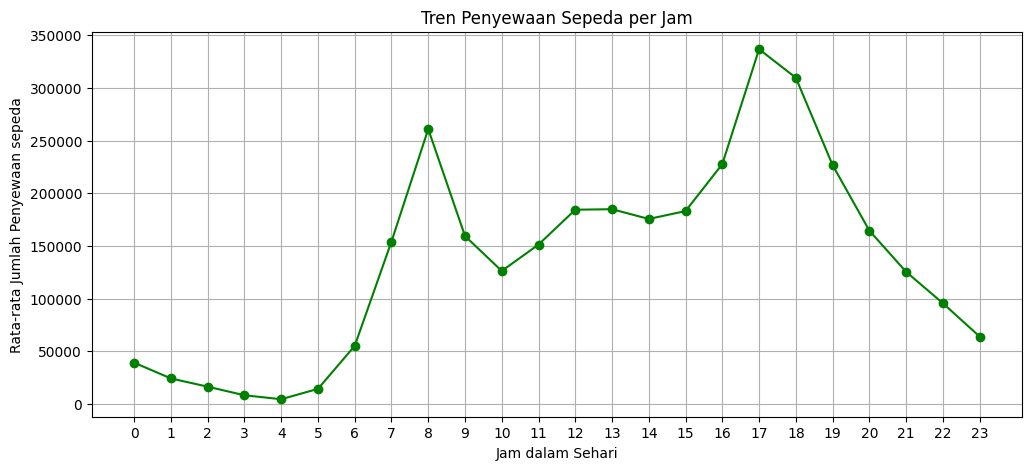

In [11]:
jam_sibuk = df_hour.groupby('hr')['cnt'].sum() 
plt.figure(figsize=(12, 5))
plt.plot(jam_sibuk.index, jam_sibuk.values, marker='o', linestyle='-', color='g')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Penyewaan sepeda')
plt.title('Tren Penyewaan Sepeda per Jam')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda apa berpengaruh ?

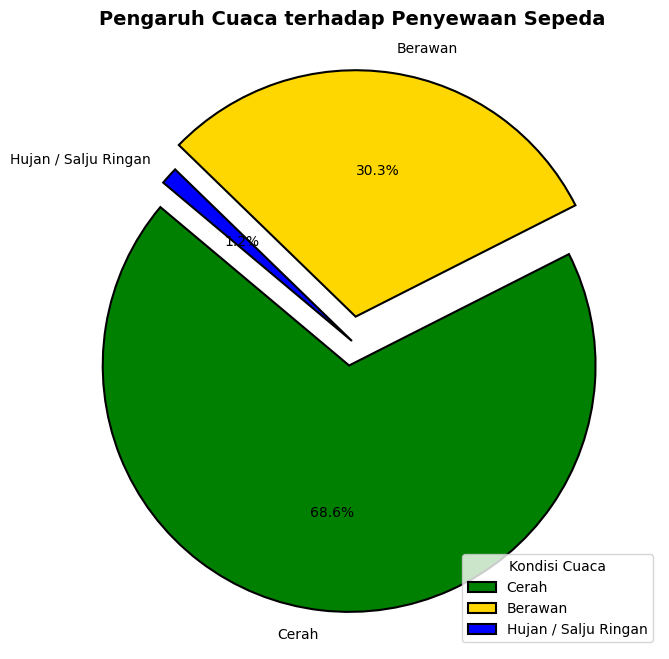

In [12]:
cuaca = df_day.groupby('weathersit').cnt.sum()
weather_labels = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan / Salju Ringan"
}
cuaca.index = cuaca.index.map(weather_labels)
plt.figure(figsize=(8, 8))
colors = ["green", "gold", "blue"] 
explode = [0.1, 0.1, 0]  
plt.pie(
    cuaca.values, labels=cuaca.index, autopct='%1.1f%%', 
    colors=colors, startangle=140, explode=explode, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  
)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=14, fontweight='bold')
plt.legend(title="Kondisi Cuaca", loc="best", fontsize=10)
plt.show()

**Insight:**
- 1. peminjaman sepeda cenderung meningkat pada pagi dan sore hari jam 7-9 total penyewa 26.1001 dan 17-19 total penyewa 33.6860, kemungkinan besar karena jam berangkat dan pulang kerja/sekolah, Oleh sebab itu banyak penyewa yg aktif. Kepada perusahan harap siap dan mengecek dengan baik stok sepeda pada jam jam yang memang padat penyewa.
- 2. cuaca sangat berpengaruh kepada penyewaan sepeda bisa di liat dalam pie chart cuaca cerah menyumbang 68.6 % dari total penyewaan yang bearti cuaca cerah sagat di tunggu untuk bersepeda kemudian cuaca berawan menyumbang 30.3% dari seluruh total sewaan yang bearti memang cuaca bagus buat bersepeda dan yang terakhir hujan/ salju ringan yang menandakan tidak cocok untuk bersepeda kecuali ada kegiatan urgent yang perlu dilakukan.

## Analisis Lanjutan (Opsional)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_5180\1827687235.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=waktu_digunakan.index, y=waktu_digunakan.values, palette=colors)


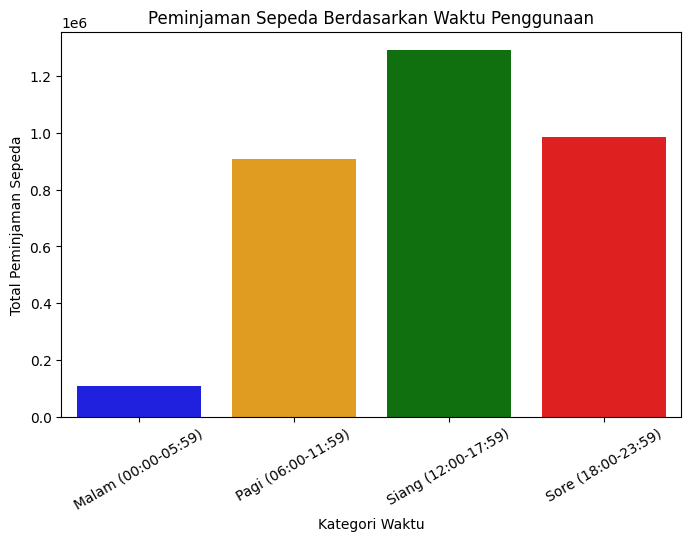

In [13]:


# Menambahkan kategori waktu berdasarkan jam
def kelompok_waktu(jam):
    if 0 <= jam < 6:
        return "Malam (00:00-05:59)"
    elif 6 <= jam < 12:
        return "Pagi (06:00-11:59)"
    elif 12 <= jam < 18:
        return "Siang (12:00-17:59)"
    else:
        return "Sore (18:00-23:59)"


df_hour["kategori_waktu"] = df_hour["hr"].apply(kelompok_waktu)
waktu_digunakan = df_hour.groupby("kategori_waktu")["cnt"].sum()
plt.figure(figsize=(8, 5))
colors = ["blue", "orange", "green", "red"]  
sns.barplot(x=waktu_digunakan.index, y=waktu_digunakan.values, palette=colors)
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Peminjaman Sepeda Berdasarkan Waktu Penggunaan")
plt.xticks(rotation=30)
plt.show()

## Conclusion

**Insight:**
- 1. peminjaman sepeda cenderung lebih banyak pada siang sore dan pagi kalau diurutkan karna merupakan jam jam berkegiatan seperti berangkan kerja, olahraga, dan pulang kerja kelompok tertinggi ada pada kelompok siang tepatnya jam 12.00 - 17.59 dimana memang dijam tersebut banyak aktifitas yang dilakukan penyewa seperti olahraga, pulang kerja, berjalan jalan menikmati udara segar dan yang lainnya kemudian ada kelompok sore - malam 18.00 - 23.59 dengan jumlah penyewa yaitu  98.6109 kemudian pada pagi hari total penyewa 90.7319 menandakan ada aktifitas signifikan seperti berangkat sekolah, berangkat kerja dan olahraga dan yang terakhir di malam dengan total penyewa 10.6509 dipastikan malam adalah jam istirahat / tidur oleh sebab itu penyewa sepeda sangat sedikit
- 2. Menjawab pertanyaan pertama : Kapan jam paling sibuk untuk penyewaan sepeda ?
jawaban : peminjaman sepeda cenderung meningkat pada pagi dan sore hari jam 8 sebanyak 359.011004 penyewa, jam 17 sebanyak 461.452055 penyewa, dan jam 18 sebanyak 425.510989 kemungkinan besar karena jam berangkat dan pulang kerja or sekolah, Oleh sebab itu banyak penyewa yg aktif.
Apa yang harus dilakukan perusahaan ? Pastikan di jam tersebut dimana puncak jam padatnya penyewa sepeda harus siap siaga melihat kondisi sepeda siap atau tidak saat diapakai, cek kondisi sepeda, cek jumlah sepeda apa cukup untuk jumlah penyewa yang sudah di data ? agar pendapatan terus meningkat
- 3. Menjawab pertanyaan kedua : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda apa berpengaruh ?
jawaban : Cuaca sangat berpengaruh kepada penyewaan sepeda bisa di liat dalam pie chart cuaca cerah menyumbang 68.6 % dari total penyewaan yang bearti cuaca cerah sagat di tunggu untuk bersepeda kemudian cuaca berawan menyumbang 30.3% dari seluruh total sewaan yang bearti memang cuaca bagus buat bersepeda dan yang terakhir hujan/ salju ringan yang menandakan tidak cocok untuk bersepeda.
Apa yang harus dilakukan peruhaan ? Ini sama sama seperti pertanyaan kedua Pastikan di cuaca tersebut dimana puncak jam padatnya penyewa sepeda harus siap siaga melihat kondisi sepeda siap atau tidak saat diapakai, cek kondisi sepeda, cek jumlah sepeda apa cukup untuk jumlah penyewa yang sudah di data ? agar pendapatan terus meningkat